# About the Dataset 

The dataset used in this analysis is from a public playlist, which contains the most streamed songs on Spotify( 500 million + ). The dataset was extracted from the Spotify web API by me. Spotify allows developers to retrieve metadata from Spotify contents, using the Spotifyr package.

Legal and Ethical Usage: The process of acquiring this data did not violate Spotify developers terms of service. Please find attached document Opeyemi Olalekan_SpotipyAPI.ipynb, to understand the data scraping method.


In [50]:
#Import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#Run before importing Kmeans

import os
os.environ["OMP_NUM_THREADS"] = '1'


#Ignore warning 
import warnings
warnings.filterwarnings('ignore')

# Explanation and Preparation of Datasets (Exploratory Data Analysis):

The spotify data is read into pandas dataframe using the code below

In [51]:
#import the dataset

spotify_df = pd.read_csv("spotify_500million_data.csv")

# Data Understanding

To preview the first 5 rows of the dataset

In [52]:
#Explore the dataset to get a better understanding of the dataset 

spotify_df.head()

,name,album,artist,release_date,duration,popularity,danceability,energy,key,loudness,...,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,Blinding Lights,Blinding Lights,The Weeknd,2019-11-29,201573,18,0.513,0.796,1,-4.075,...,0.0938,0.345,171.017,audio_features,0sf12qNH5qcw8qpgymFOqD,spotify:track:0sf12qNH5qcw8qpgymFOqD,https://api.spotify.com/v1/tracks/0sf12qNH5qcw...,https://api.spotify.com/v1/audio-analysis/0sf1...,201573,4
1,Shape of You,÷ (Deluxe),Ed Sheeran,2017-03-03,233712,88,0.825,0.652,1,-3.183,...,0.0931,0.931,95.977,audio_features,7qiZfU4dY1lWllzX7mPBI3,spotify:track:7qiZfU4dY1lWllzX7mPBI3,https://api.spotify.com/v1/tracks/7qiZfU4dY1lW...,https://api.spotify.com/v1/audio-analysis/7qiZ...,233713,4
2,Someone You Loved,Divinely Uninspired To A Hellish Extent,Lewis Capaldi,2019-05-17,182160,90,0.501,0.405,1,-5.679,...,0.1050,0.446,109.891,audio_features,7qEHsqek33rTcFNT9PFqLf,spotify:track:7qEHsqek33rTcFNT9PFqLf,https://api.spotify.com/v1/tracks/7qEHsqek33rT...,https://api.spotify.com/v1/audio-analysis/7qEH...,182161,4
3,Sunflower - Spider-Man: Into the Spider-Verse,Spider-Man: Into the Spider-Verse (Deluxe Edit...,Post Malone,2019-02-22,158040,56,0.761,0.479,2,-5.574,...,0.0704,0.912,89.913,audio_features,7dbka99KTWke5o9hRp0JoB,spotify:track:7dbka99KTWke5o9hRp0JoB,https://api.spotify.com/v1/tracks/7dbka99KTWke...,https://api.spotify.com/v1/audio-analysis/7dbk...,158040,4
4,Dance Monkey,Dance Monkey (Stripped Back) / Dance Monkey,Tones And I,2019-10-17,209438,78,0.824,0.588,6,-6.400,...,0.1490,0.513,98.027,audio_features,2XU0oxnq2qxCpomAAuJY8K,spotify:track:2XU0oxnq2qxCpomAAuJY8K,https://api.spotify.com/v1/tracks/2XU0oxnq2qxC...,https://api.spotify.com/v1/audio-analysis/2XU0...,209438,4


The result of the shape functions shows that the dataset has 1358 rows and 24 columns.

In [53]:
#Check the number of rows and columns
spotify_df.shape

(1358, 24)

To get an overview of the structure of the dataset. 

In [54]:
#Explore the dataset to get a better understanding of the dataset 
spotify_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1358 entries, 0 to 1357
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              1358 non-null   object 
 1   album             1358 non-null   object 
 2   artist            1358 non-null   object 
 3   release_date      1358 non-null   object 
 4   duration          1358 non-null   int64  
 5   popularity        1358 non-null   int64  
 6   danceability      1358 non-null   float64
 7   energy            1358 non-null   float64
 8   key               1358 non-null   int64  
 9   loudness          1358 non-null   float64
 10  mode              1358 non-null   int64  
 11  speechiness       1358 non-null   float64
 12  acousticness      1358 non-null   float64
 13  instrumentalness  1358 non-null   float64
 14  liveness          1358 non-null   float64
 15  valence           1358 non-null   float64
 16  tempo             1358 non-null   float64


To get the sum of missing values in each column: 

In [55]:
#Take the sum of null values in the dataframe
spotify_df.isna().sum()


name                0
album               0
artist              0
release_date        0
duration            0
popularity          0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
type                0
id                  0
uri                 0
track_href          0
analysis_url        0
duration_ms         0
time_signature      0
dtype: int64

To get the descriptive statistics for each of the numerical column in the dataset:

In [56]:
#Explore the dataset to get a better understanding of the dataset 
spotify_df.describe()

,duration,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,1358.00000,1358.000000,1358.00000,1358.000000,1358.000000,1358.000000,1358.000000,1358.00000,1358.000000,1358.000000,1358.000000,1358.000000,1358.000000,1358.000000,1358.000000
mean,219513.04271,69.953608,0.66137,0.653753,5.150957,-6.312395,0.592047,0.09381,0.203148,0.011824,0.173001,0.499954,120.331183,219473.561856,3.969809
std,47702.48056,24.071927,0.14254,0.171284,3.649336,2.419352,0.491635,0.08844,0.233527,0.071647,0.131161,0.226574,28.250120,47695.519110,0.239383
min,95466.00000,0.000000,0.18800,0.111000,0.000000,-22.320000,0.000000,0.02320,0.000025,0.000000,0.021500,0.039700,63.050000,95467.000000,1.000000
25%,190430.25000,72.000000,0.57425,0.540000,1.000000,-7.501750,0.000000,0.03820,0.027600,0.000000,0.092600,0.326000,97.980500,190431.000000,4.000000
50%,214659.50000,78.000000,0.67650,0.675000,5.000000,-5.842000,1.000000,0.05625,0.109000,0.000000,0.120000,0.493500,118.407500,214580.000000,4.000000
75%,240989.50000,83.000000,0.76175,0.785750,8.000000,-4.690500,1.000000,0.10675,0.300000,0.000079,0.209000,0.679500,136.820750,240746.750000,4.000000
max,613026.00000,99.000000,0.96700,0.989000,11.000000,-1.190000,1.000000,0.53000,0.985000,0.925000,0.890000,0.980000,205.846000,613027.000000,5.000000


To ensure that there are no repeated rows in the spotify dataset:

In [57]:
#check for duplicate values 
spotify_df.duplicated().sum()


0

# Data Preparation

Categorical columns which contains link to the tracks will be dropped from the data frame as these columns won't be needed for the clustering analysis. However, identifiers such as name, album, and artist are retained to label each song post-analysis.

In [58]:
#Drop columns not needed for our segmentation. 
spotify_df = spotify_df.drop(['release_date', 'duration','type','id','uri', 'track_href', 'analysis_url','duration_ms'
                             ], axis = 1)

In [59]:
 spotify_df.head()

,name,album,artist,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,Blinding Lights,Blinding Lights,The Weeknd,18,0.513,0.796,1,-4.075,1,0.0629,0.00147,0.000209,0.0938,0.345,171.017,4
1,Shape of You,÷ (Deluxe),Ed Sheeran,88,0.825,0.652,1,-3.183,0,0.0802,0.58100,0.000000,0.0931,0.931,95.977,4
2,Someone You Loved,Divinely Uninspired To A Hellish Extent,Lewis Capaldi,90,0.501,0.405,1,-5.679,1,0.0319,0.75100,0.000000,0.1050,0.446,109.891,4
3,Sunflower - Spider-Man: Into the Spider-Verse,Spider-Man: Into the Spider-Verse (Deluxe Edit...,Post Malone,56,0.761,0.479,2,-5.574,1,0.0466,0.55200,0.000000,0.0704,0.912,89.913,4
4,Dance Monkey,Dance Monkey (Stripped Back) / Dance Monkey,Tones And I,78,0.824,0.588,6,-6.400,0,0.0924,0.69200,0.000104,0.1490,0.513,98.027,4


The new shape of the data set contains 1358 rows and 16 columns


In [60]:
#Print the shape of the dataframe after dropping unneeded columns
spotify_df.shape

(1358, 16)

# Visualization 

Hierarchical (Agglomerative Clustering method) is sensitive to the scale of data, the closer the variables distribution to normal, the more reliable the clustering will be.

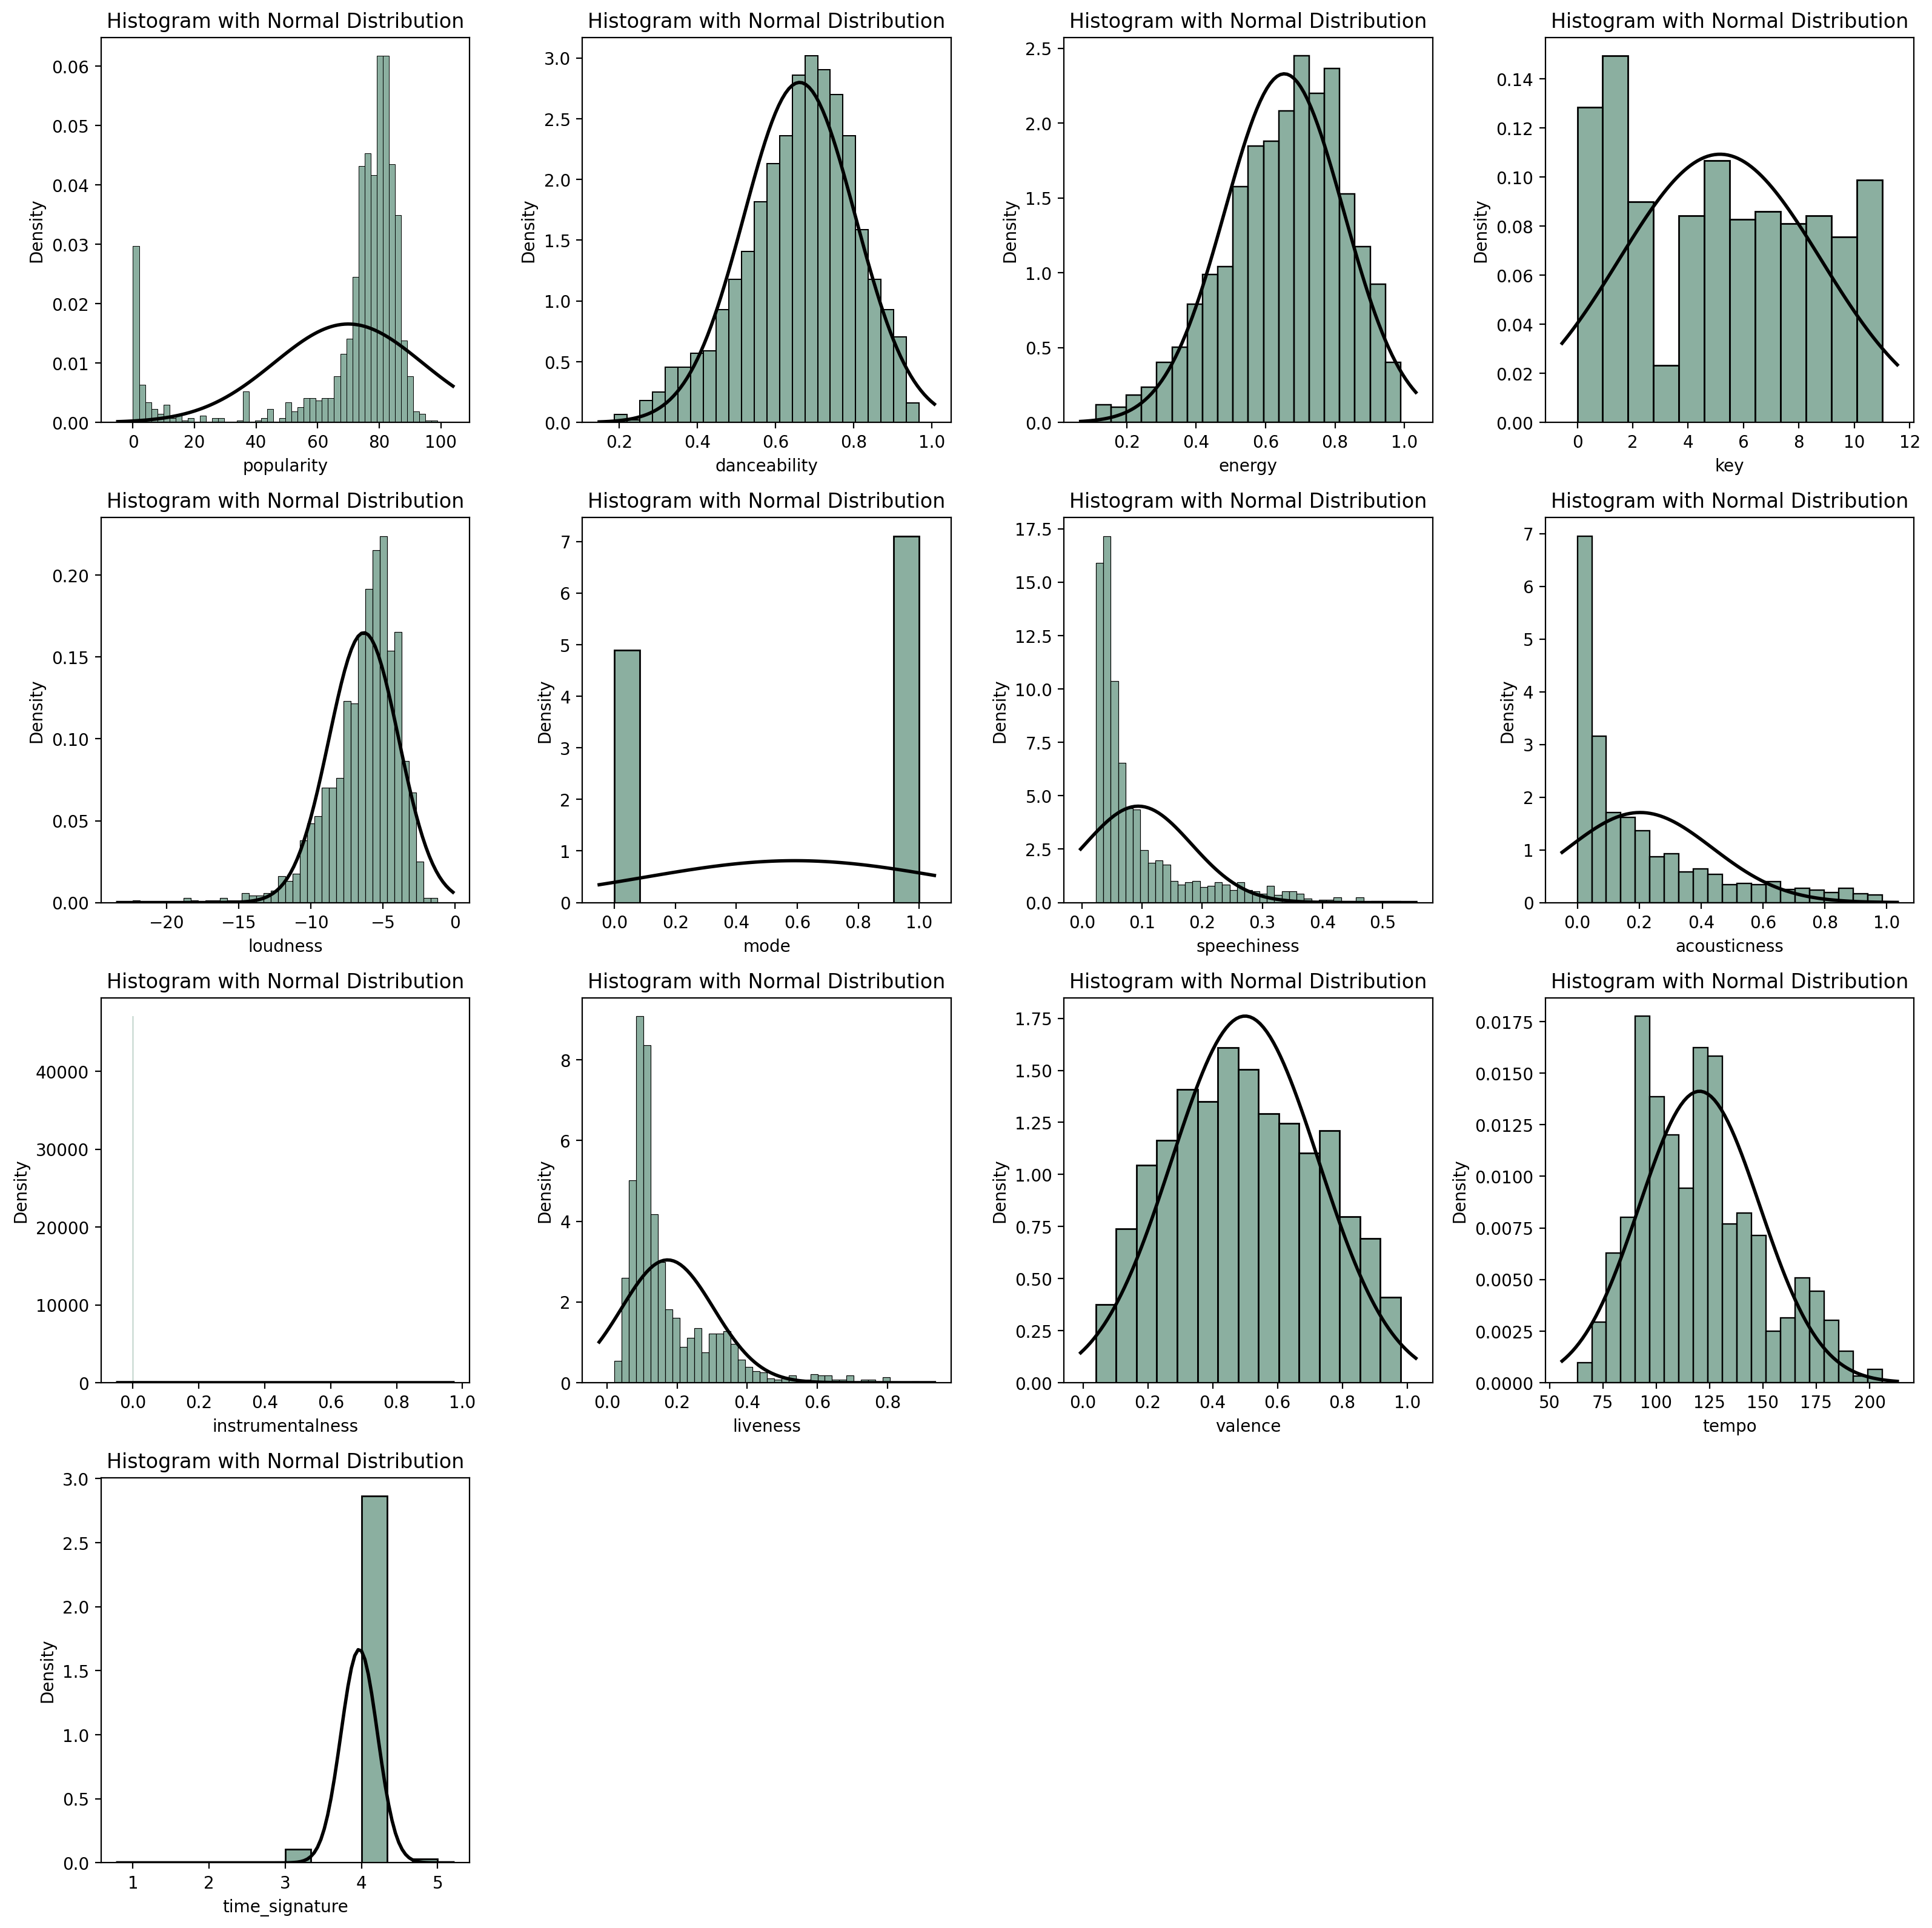

In [61]:
# checking for skewness in the data
import scipy.stats as stats

# Setting up a 4x4 grid
plt.figure(figsize=(16, 16))

num_of_attributes = len(spotify_df.iloc[:, 3:].columns)

for x, y in enumerate(spotify_df.iloc[:, 3:].columns):
    plt.subplot(4, 4, x + 1)
    
    
    sns.histplot(x=spotify_df[y], color="#659580", kde=False, stat="density")

    # Overlaying a normal distribution curve
    mean = spotify_df[y].mean()
    std = spotify_df[y].std()
    xmin, xmax = plt.xlim()  
    x = np.linspace(xmin, xmax, 100)
    p = stats.norm.pdf(x, mean, std)
    plt.plot(x, p, 'k', linewidth=2)

    plt.xlabel(y)
    plt.title('Histogram with Normal Distribution')

plt.tight_layout()
plt.show()


# Checking for Outliers
Outliers can have a disproportionately negative effect on the results of K-Means and Hierachical clustering, though hierachical clustering is less sensitive to outlier when compared to K-means

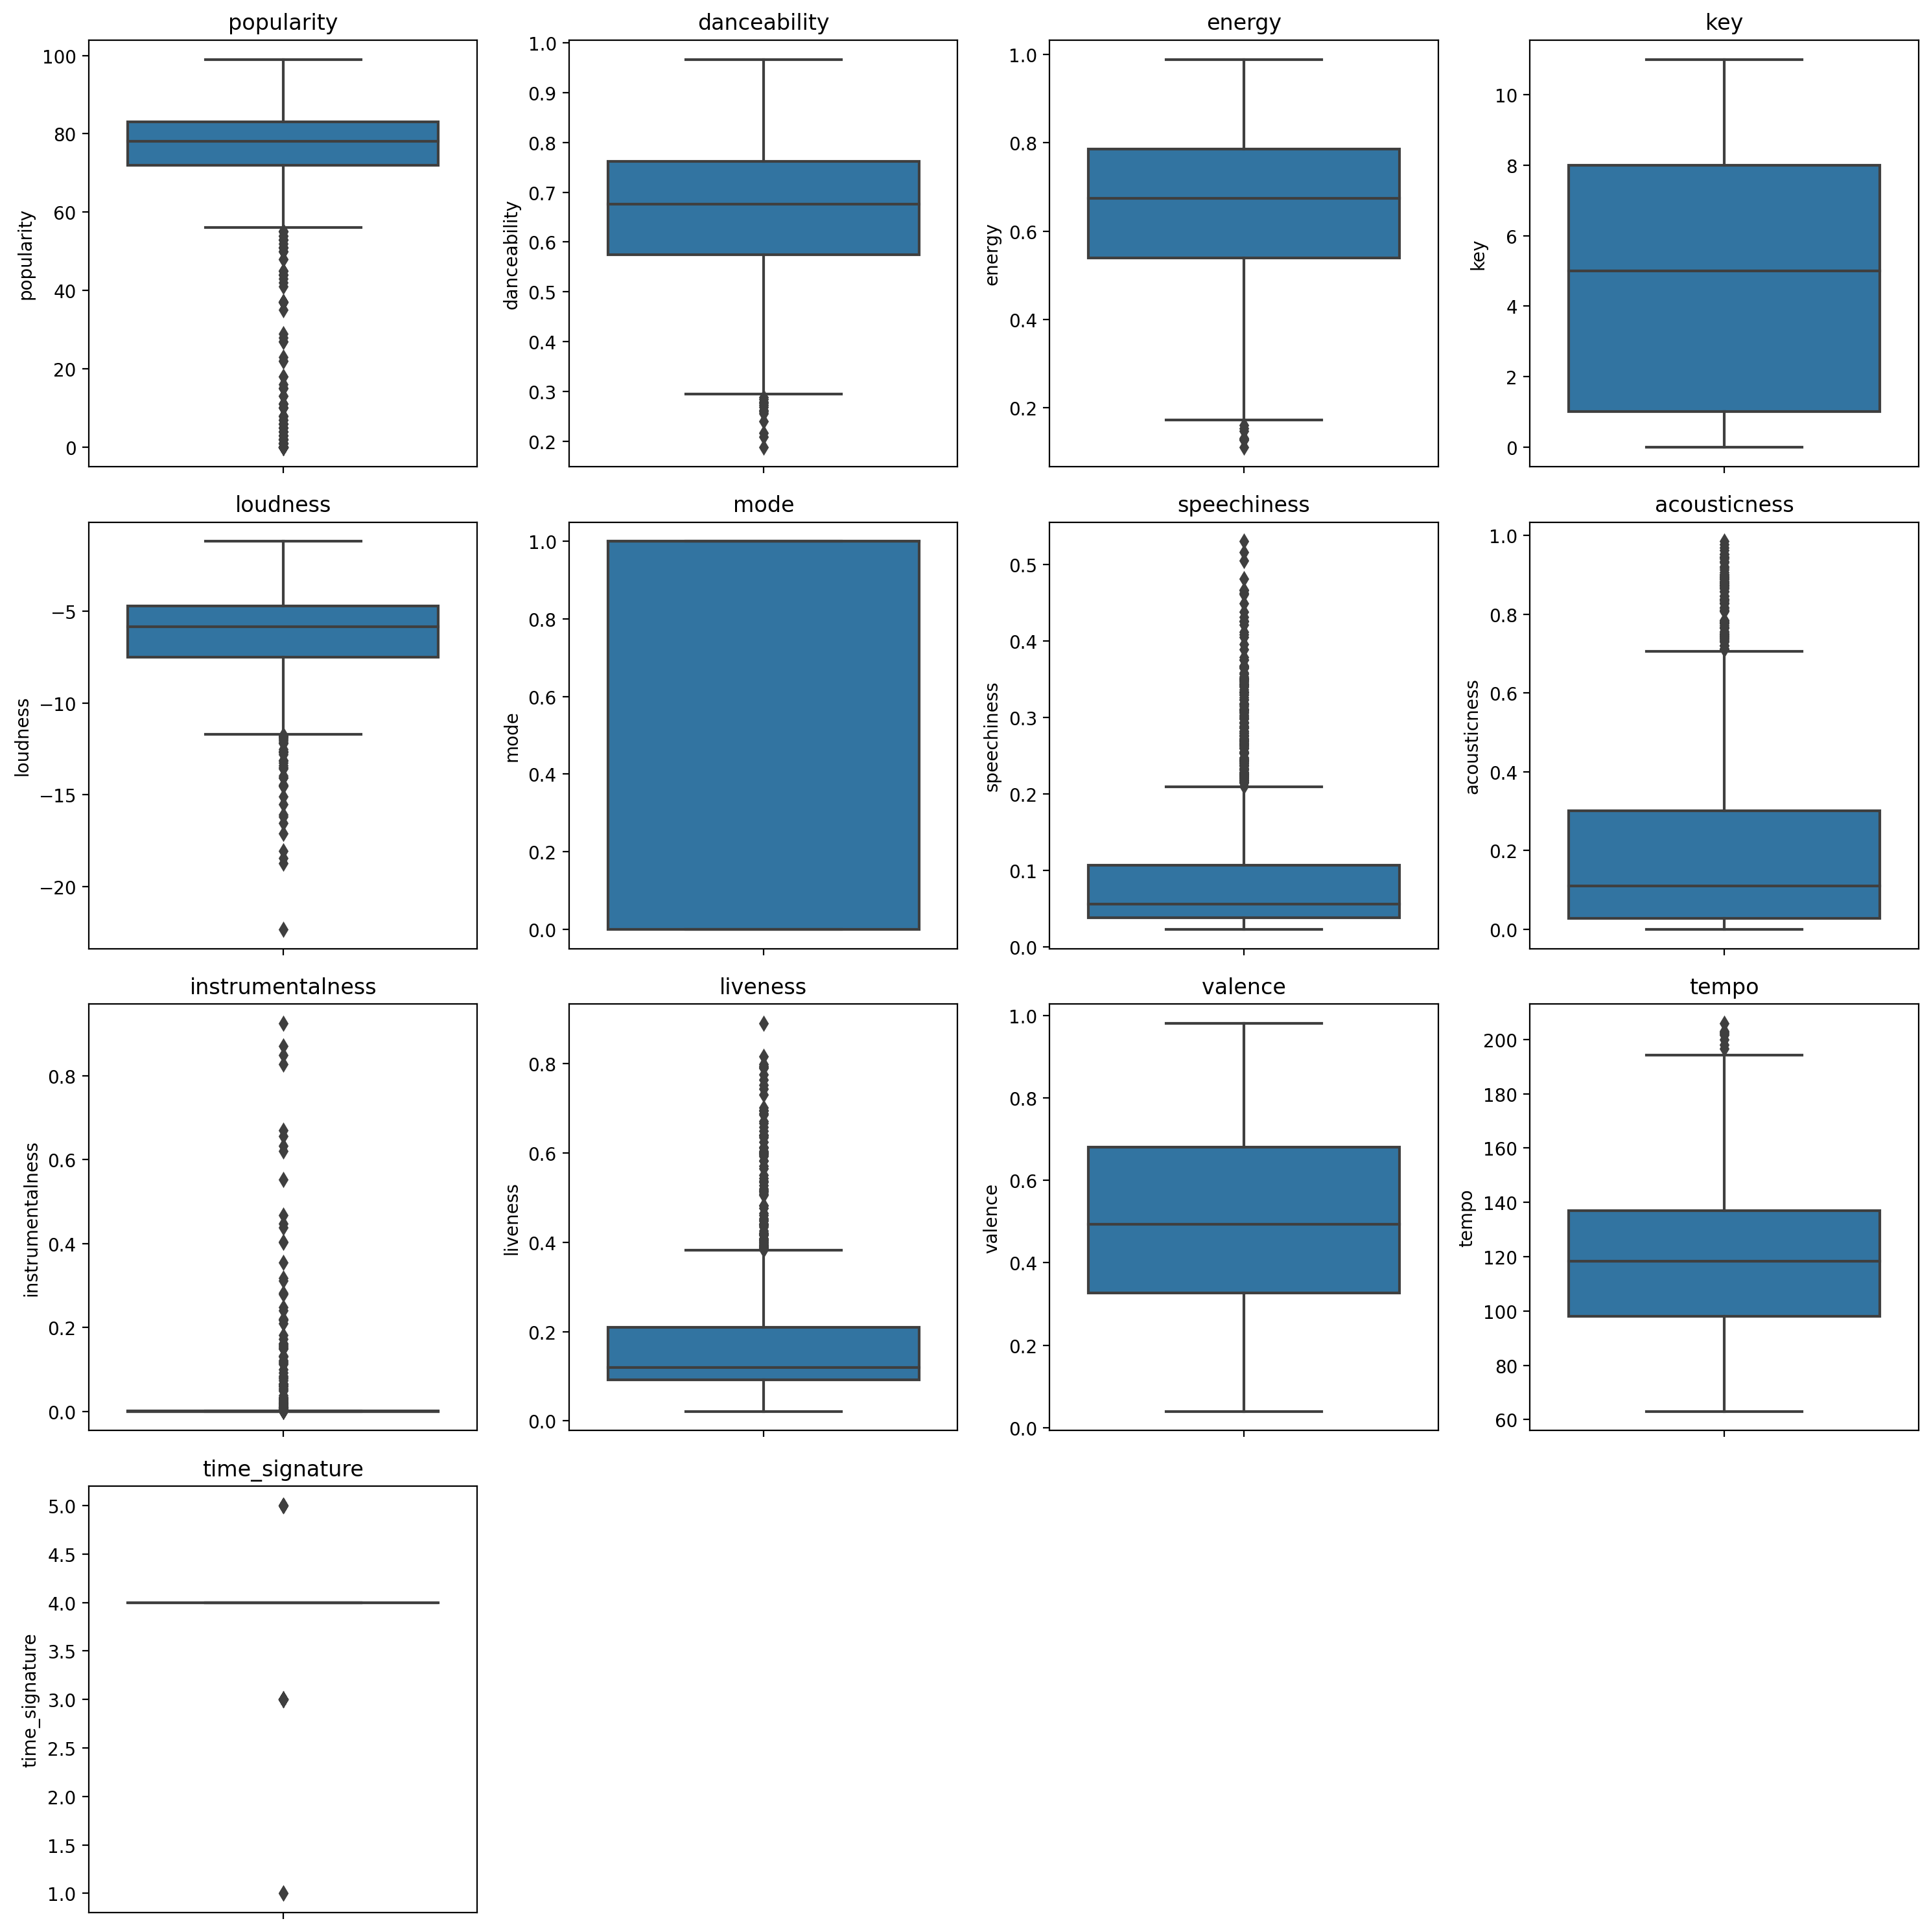

In [62]:
#Box plot to check outliers in the distribution of each column 
plt.figure(figsize=(15, 15))  
numerical_cols= spotify_df.iloc[:, 3:]
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 4, i+1) 
    sns.boxplot(y=spotify_df[col])
    plt.title(col)

plt.tight_layout() 
plt.show()


From the box plots above, it can be seen that the popularity variable shows a concentration of 
values at the high end, indicating most of the songs have a high popularity score. The mode variable 
is a categorical feature that is encoded(major or minor mode), time_signature and key are also 
categorical variables.


In [63]:
#Value count of time_signature variable
spotify_df['time_signature'].value_counts()

time_signature
4    1295
3      48
5      13
1       2
Name: count, dtype: int64

In [64]:
#Value count of instrumentalness variable
spotify_df['instrumentalness'].value_counts()

instrumentalness
0.000000    709
0.000001      3
0.001010      3
0.000004      3
0.002940      3
           ... 
0.000265      1
0.000004      1
0.008530      1
0.001610      1
0.248000      1
Name: count, Length: 578, dtype: int64

In [65]:
#Value count of mode variable
spotify_df['mode'].value_counts()

mode
1    804
0    554
Name: count, dtype: int64

In [66]:
spotify_df['key'].value_counts()

key
1     186
0     160
5     133
11    123
2     112
7     107
9     105
4     105
6     103
8     101
10     94
3      29
Name: count, dtype: int64

As also observed from the boxplots above, 'instrumentalness' is heavily skewed with a predominant frequency of zero values, this 
indicate that majority of the tracks are not with high instrumentals. The 'time signature' also exhibits significant 
skewness. 

# Dropping columns

Before dropping these categorical columns, one hot encoding was done but the result of the 
clustering was poor(the One Hot Encoding process is not shown in this analysis). Hence, they are being dropped

In [67]:
#Dropping the time signature, mode and key
spotify_df = spotify_df.drop(['time_signature', 'key', 'mode'], axis =1)

# Correlation:
    
The correlation matrix displays the associations between audio features. Many low correlation 
coefficients indicate independence of information in each feature. Highly correlated features may
not be ideal for clustering.


In [68]:
#How do the columns correlate to each other?
corr_spotify_df =spotify_df.corr(numeric_only = True)
corr_spotify_df 

,popularity,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
popularity,1.000000,-0.043404,0.008628,-0.017604,-0.037887,0.067255,0.001369,0.033421,0.012711,0.012652
danceability,-0.043404,1.000000,0.024204,0.154988,0.214068,-0.135760,-0.028789,-0.037755,0.344500,-0.154138
energy,0.008628,0.024204,1.000000,0.676394,0.000974,-0.583200,-0.020820,0.141903,0.431151,0.076437
loudness,-0.017604,0.154988,0.676394,1.000000,-0.004674,-0.405779,-0.176868,0.043148,0.302691,0.029214
speechiness,-0.037887,0.214068,0.000974,-0.004674,1.000000,-0.055613,-0.033955,0.029887,0.015887,0.150039
acousticness,0.067255,-0.135760,-0.583200,-0.405779,-0.055613,1.000000,0.017825,-0.087623,-0.200102,-0.048790
instrumentalness,0.001369,-0.028789,-0.020820,-0.176868,-0.033955,0.017825,1.000000,0.019539,-0.106763,-0.003936
liveness,0.033421,-0.037755,0.141903,0.043148,0.029887,-0.087623,0.019539,1.000000,0.047130,0.005830
valence,0.012711,0.344500,0.431151,0.302691,0.015887,-0.200102,-0.106763,0.047130,1.000000,0.011369
tempo,0.012652,-0.154138,0.076437,0.029214,0.150039,-0.048790,-0.003936,0.005830,0.011369,1.000000


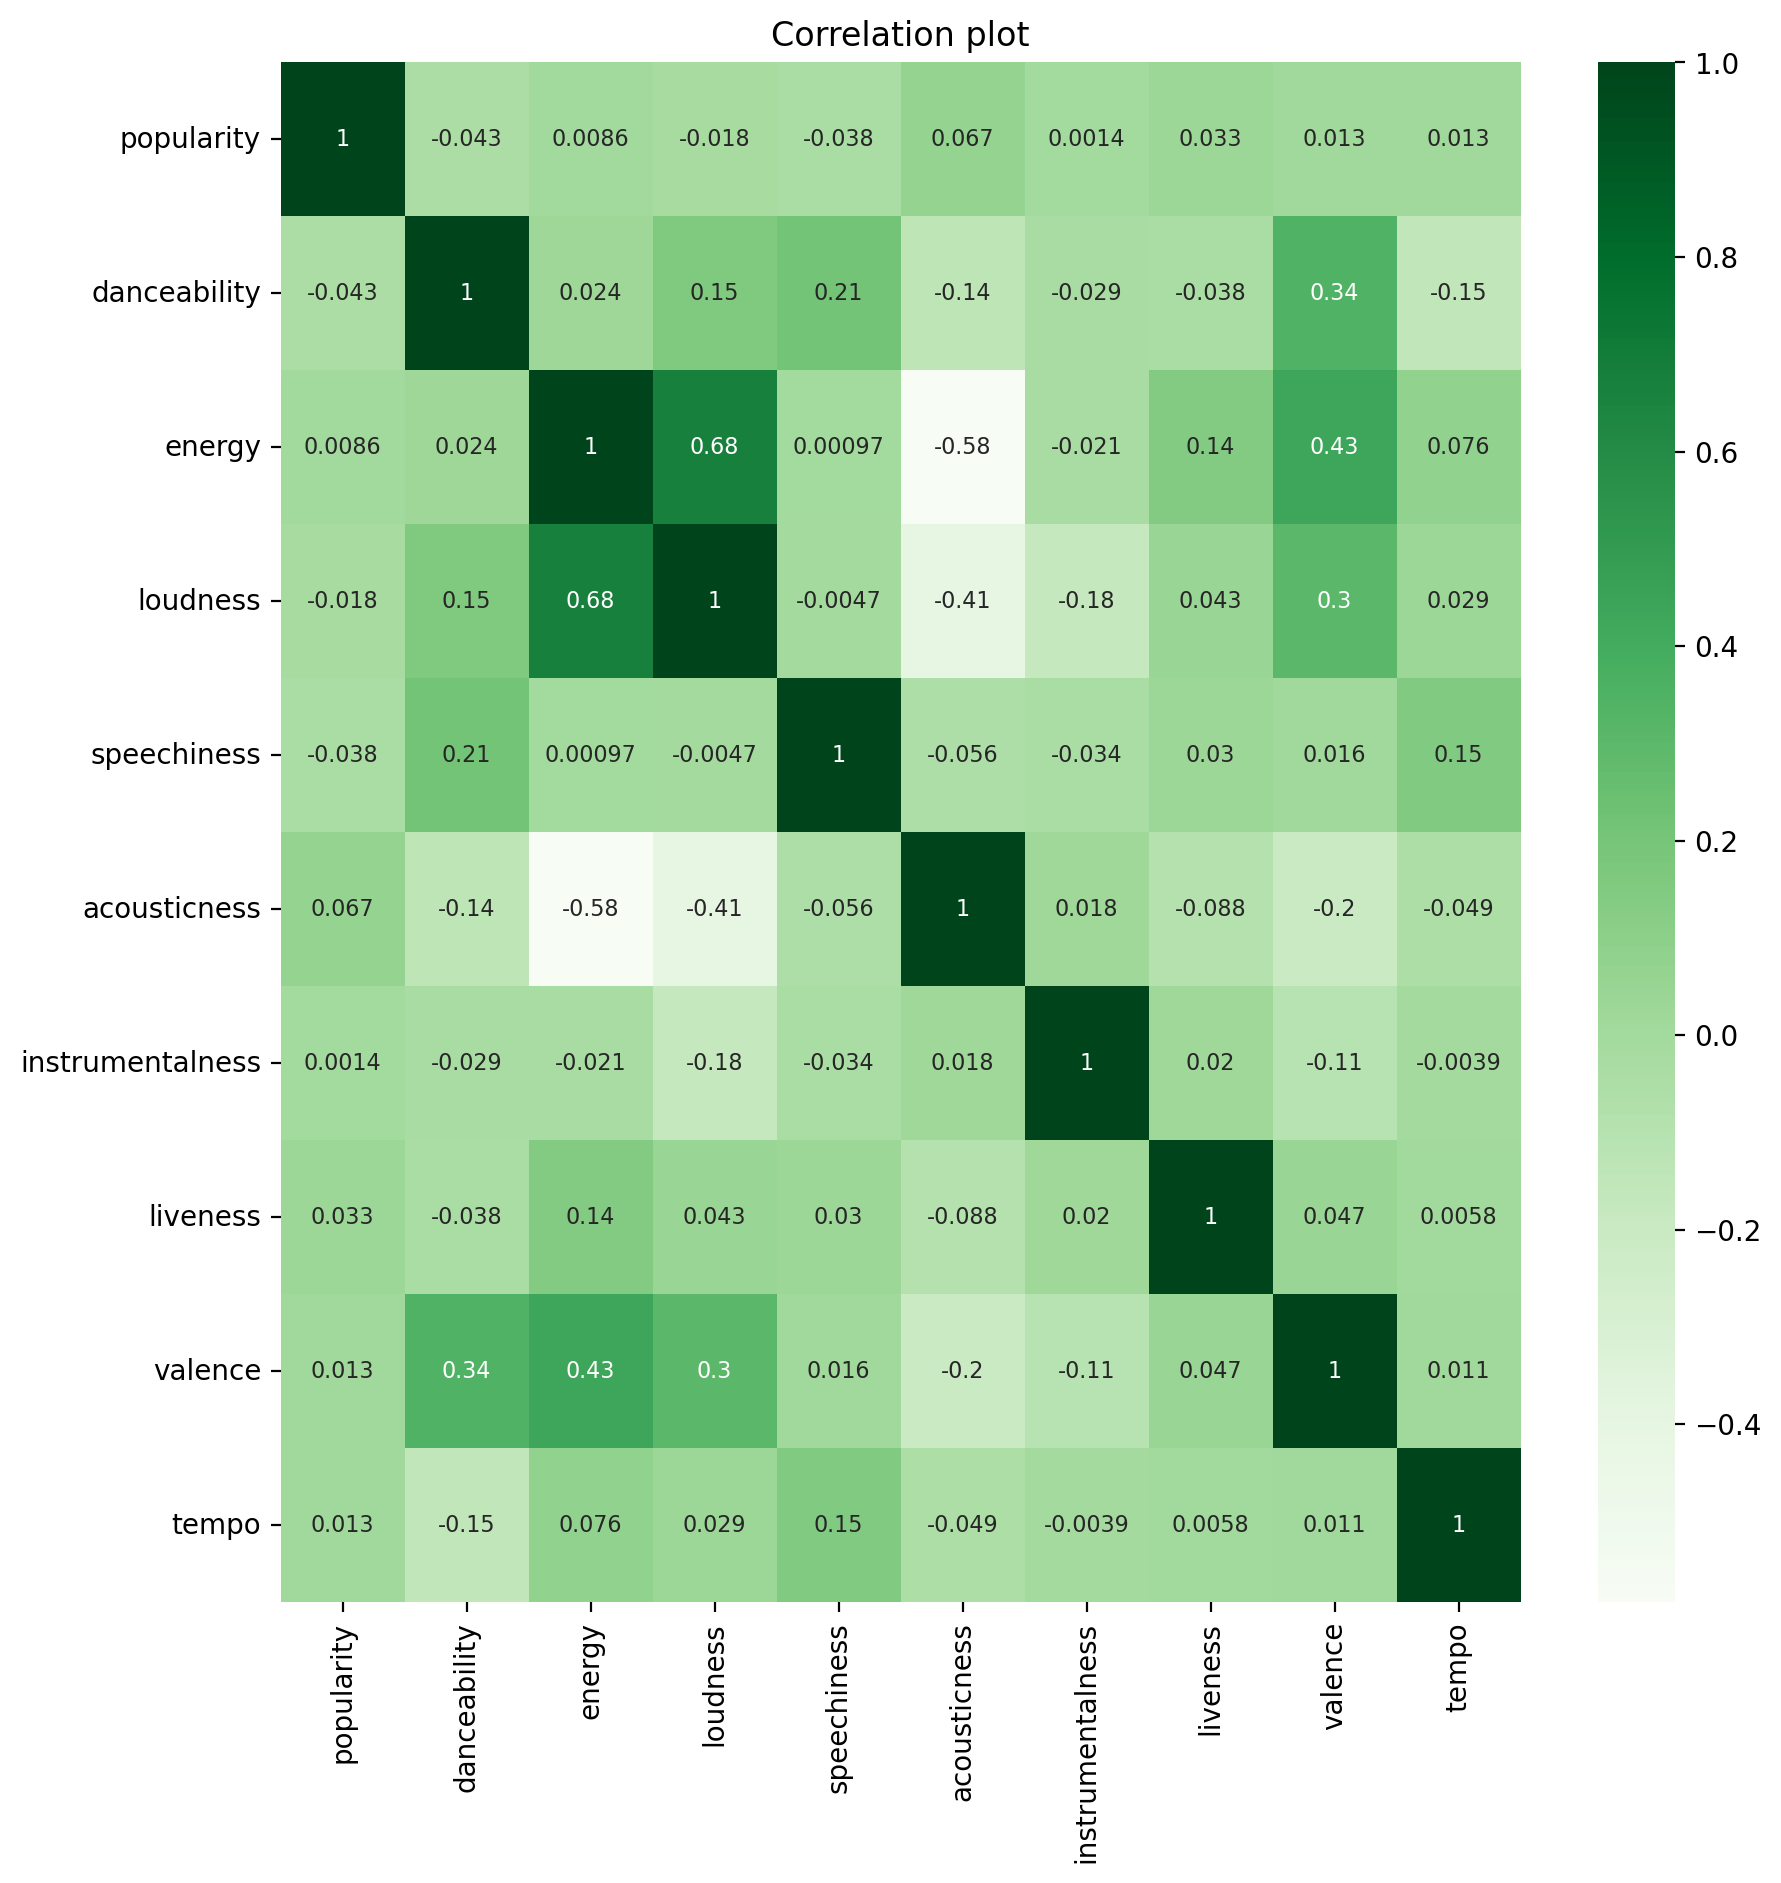

In [69]:
# visualising correlation

## heatmap 
plt.figure(figsize=(10,10))
sns.heatmap(corr_spotify_df , annot= True, cmap= "Greens", annot_kws={"size" : 8}) 
plt.title('Correlation plot', loc = "center")
plt.show()
%config InlineBackend.figure_format='retina'

In [70]:
#Take a copy of the dataset for log transformation 
log_spotify_df = spotify_df.copy()

# Log Transformation:
    
To improve the cluster separation, log transformation can help to reduce the effect of outliers in the 
skewed variables - speechless, acoustics, liveness will be normalized by using log transformation. 
The transformation can lead to more distinct and interpretable clusters.


In [71]:
#Taking the log of skewed columns 

log_spotify_df['log_speechiness'] = np.log(log_spotify_df['speechiness'] + 1e-9)
log_spotify_df['log_acousticness'] = np.log(log_spotify_df['acousticness'] + 1e-9)
log_spotify_df['log_liveness'] = np.log(log_spotify_df['liveness'] + 1e-9)
log_spotify_df['instrumentalness'] = np.log(log_spotify_df['instrumentalness'] + 1e-9)
log_spotify_df = log_spotify_df.drop(['speechiness', 'acousticness','liveness', 'instrumentalness'],axis = 1)
log_spotify_df.head()


,name,album,artist,popularity,danceability,energy,loudness,valence,tempo,log_speechiness,log_acousticness,log_liveness
0,Blinding Lights,Blinding Lights,The Weeknd,18,0.513,0.796,-4.075,0.345,171.017,-2.766209,-6.522492,-2.366590
1,Shape of You,÷ (Deluxe),Ed Sheeran,88,0.825,0.652,-3.183,0.931,95.977,-2.523232,-0.543005,-2.374081
2,Someone You Loved,Divinely Uninspired To A Hellish Extent,Lewis Capaldi,90,0.501,0.405,-5.679,0.446,109.891,-3.445149,-0.286350,-2.253795
3,Sunflower - Spider-Man: Into the Spider-Verse,Spider-Man: Into the Spider-Verse (Deluxe Edit...,Post Malone,56,0.761,0.479,-5.574,0.912,89.913,-3.066155,-0.594207,-2.653562
4,Dance Monkey,Dance Monkey (Stripped Back) / Dance Monkey,Tones And I,78,0.824,0.588,-6.400,0.513,98.027,-2.381628,-0.368169,-1.903809


Plotting the columns after log transformation on columns with much outliers and those whose 
distribution are right skewed.

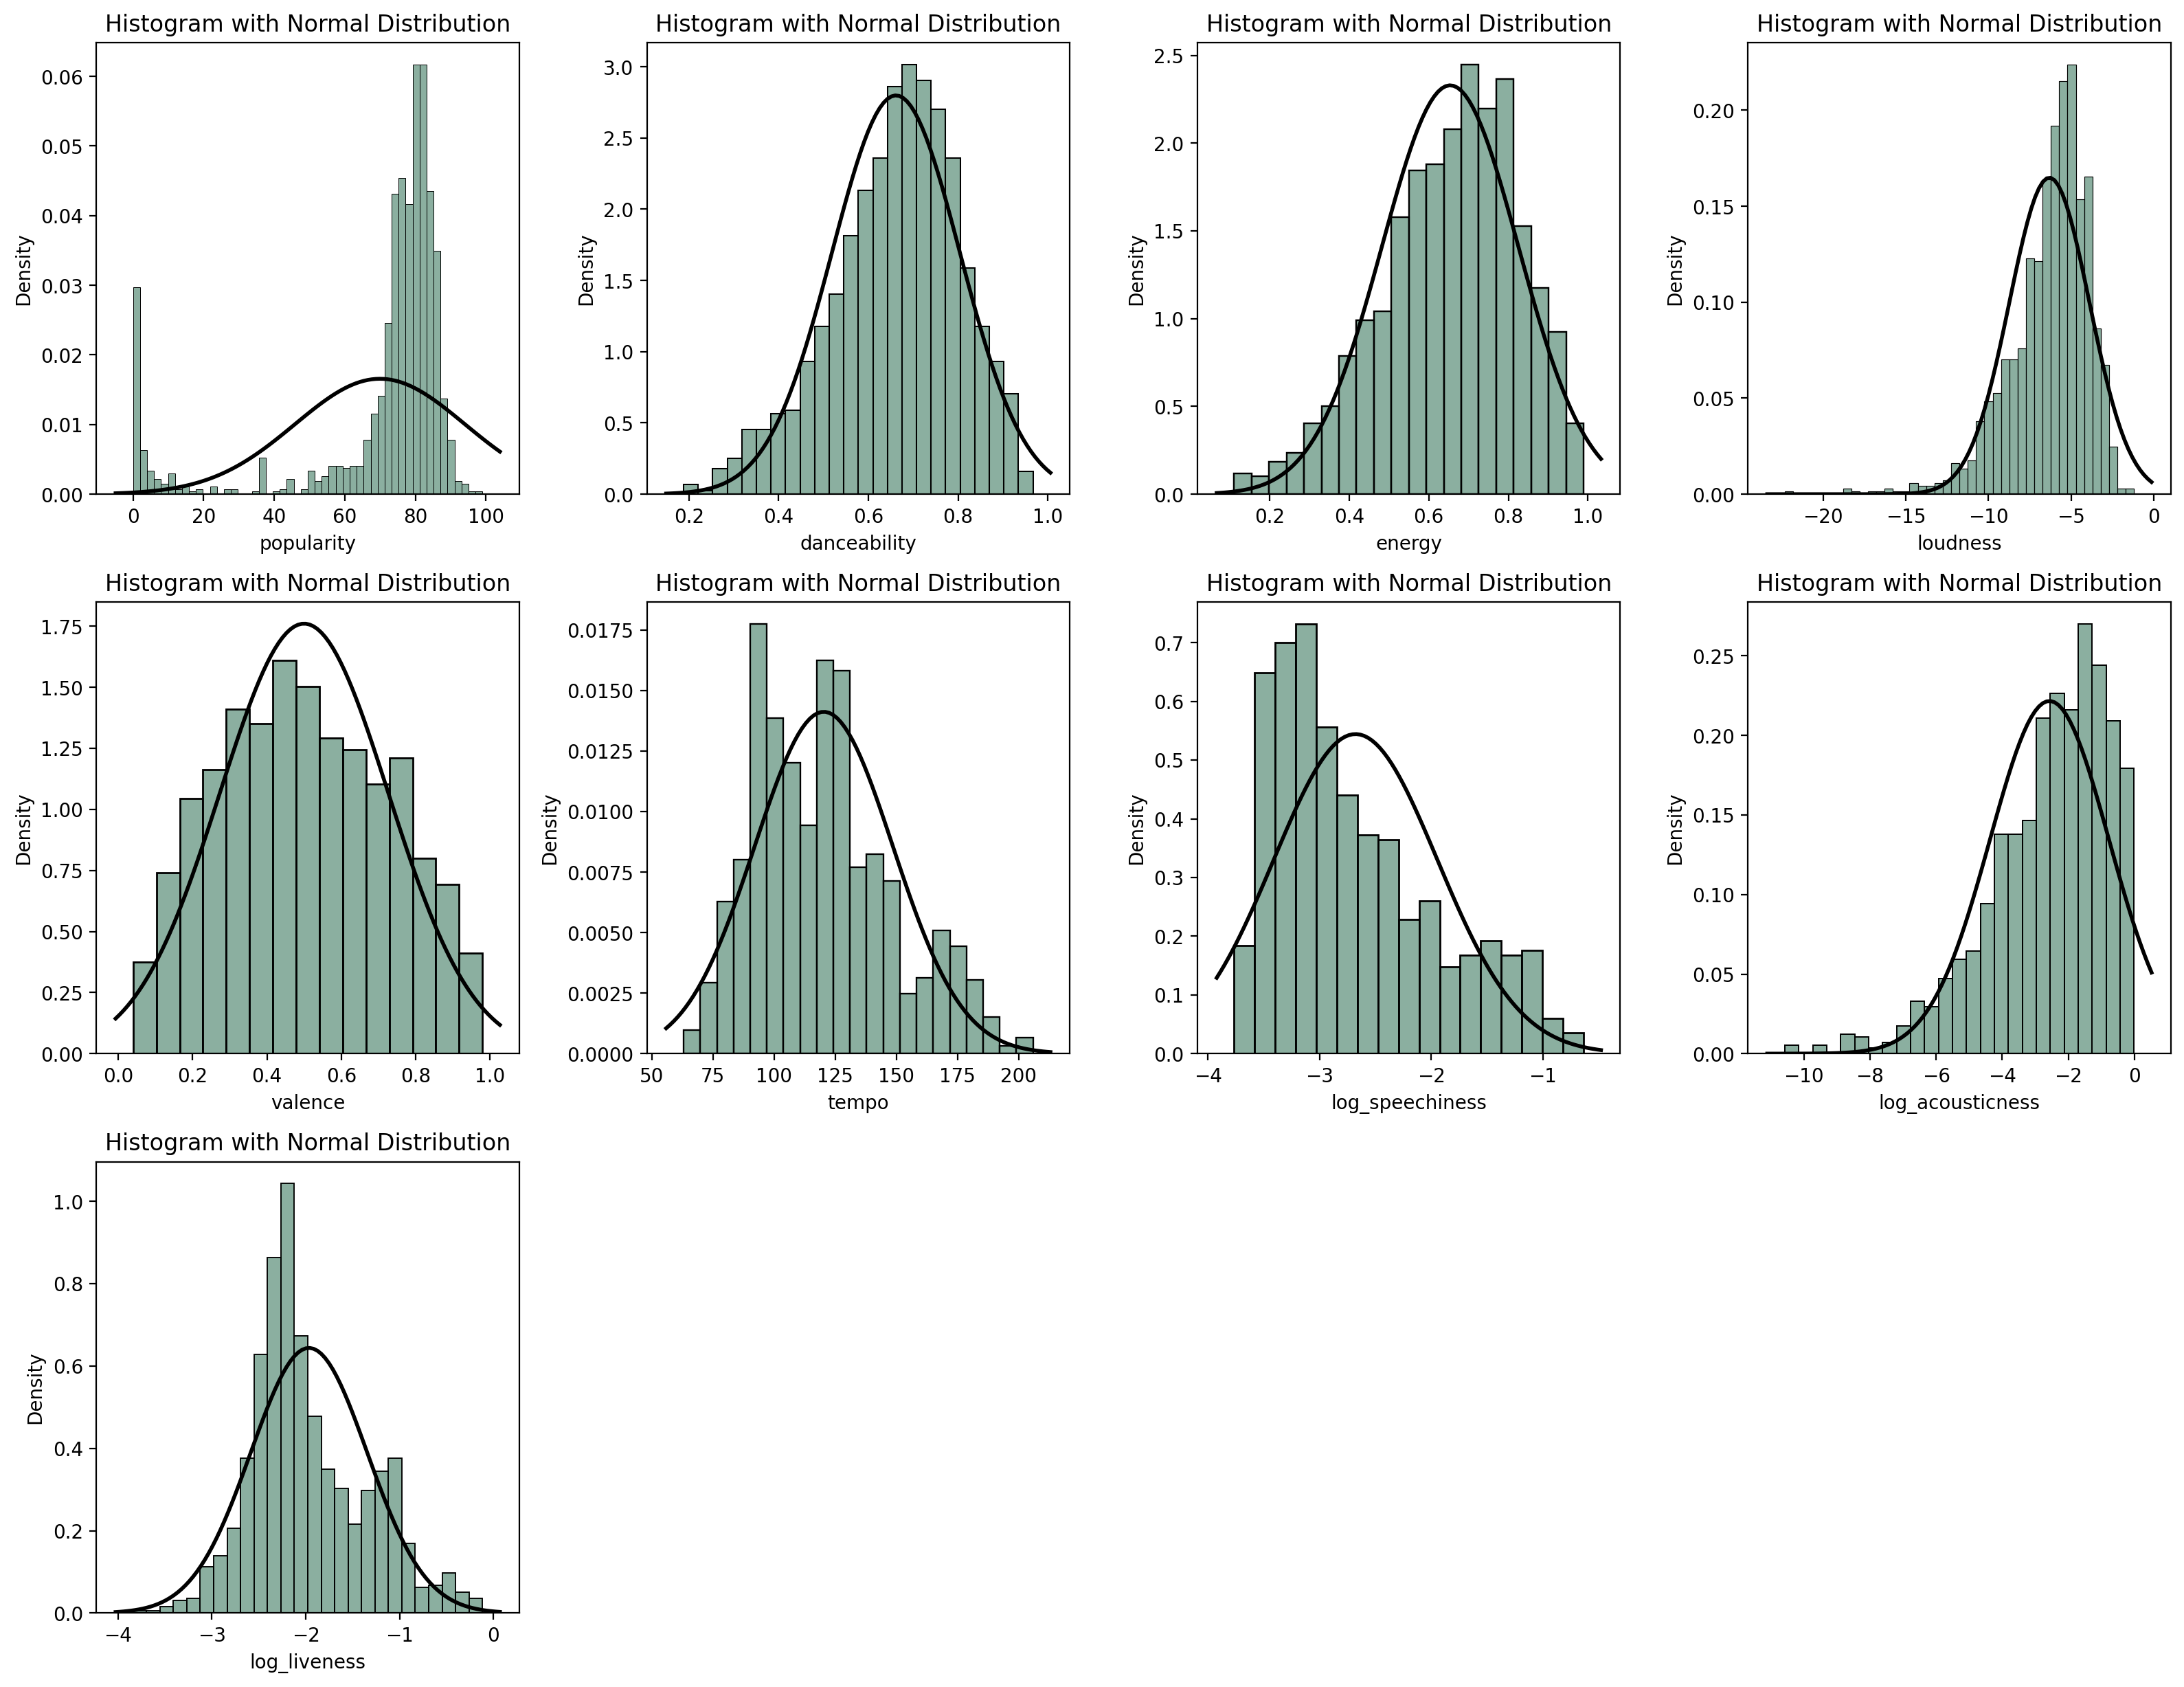

In [72]:
#Plotting the whole columns after log transformation 
import scipy.stats as stats
# Setting up a 4x4 grid
plt.figure(figsize=(16, 16))
num_of_attributes = len(log_spotify_df.iloc[:, 3:].columns)
for x, y in enumerate(log_spotify_df.iloc[:, 3:].columns):
    plt.subplot(4, 4, x + 1)
    sns.histplot(x=log_spotify_df[y], color="#659580", kde=False, stat="density")
 # Overlaying a normal distribution curve
    mean = log_spotify_df[y].mean()
    std = log_spotify_df[y].std()
    xmin, xmax = plt.xlim()  
    x = np.linspace(xmin, xmax, 100)
    p = stats.norm.pdf(x, mean, std)
    plt.plot(x, p, 'k', linewidth=2)
    plt.xlabel(y)
    plt.title('Histogram with Normal Distribution')
plt.tight_layout()
plt.show()

The log transformation was effective in reducing skewness. Log transformation was not used for 
popularity variable because it works only on right skewed distribution. Popularity variable is left 
skewed. 

# Box Cox Transformation

Box cox transformer can help in reducing left skewnees in popularity variable.


In [73]:
from sklearn.preprocessing import PowerTransformer
# Create a PowerTransformer object with Box-Cox transformation
box_cox_transformer = PowerTransformer(method='box-cox')

log_spotify_df['popularity'] += (1 - log_spotify_df['popularity'].min())  # Shift to be strictly positive if necessary

popularity_reshaped =log_spotify_df['popularity'].values.reshape(-1, 1)

# Apply the Box-Cox transformation
log_spotify_df['popularity'] = box_cox_transformer.fit_transform(popularity_reshaped)

Plotting the variable to see result of the transformation:

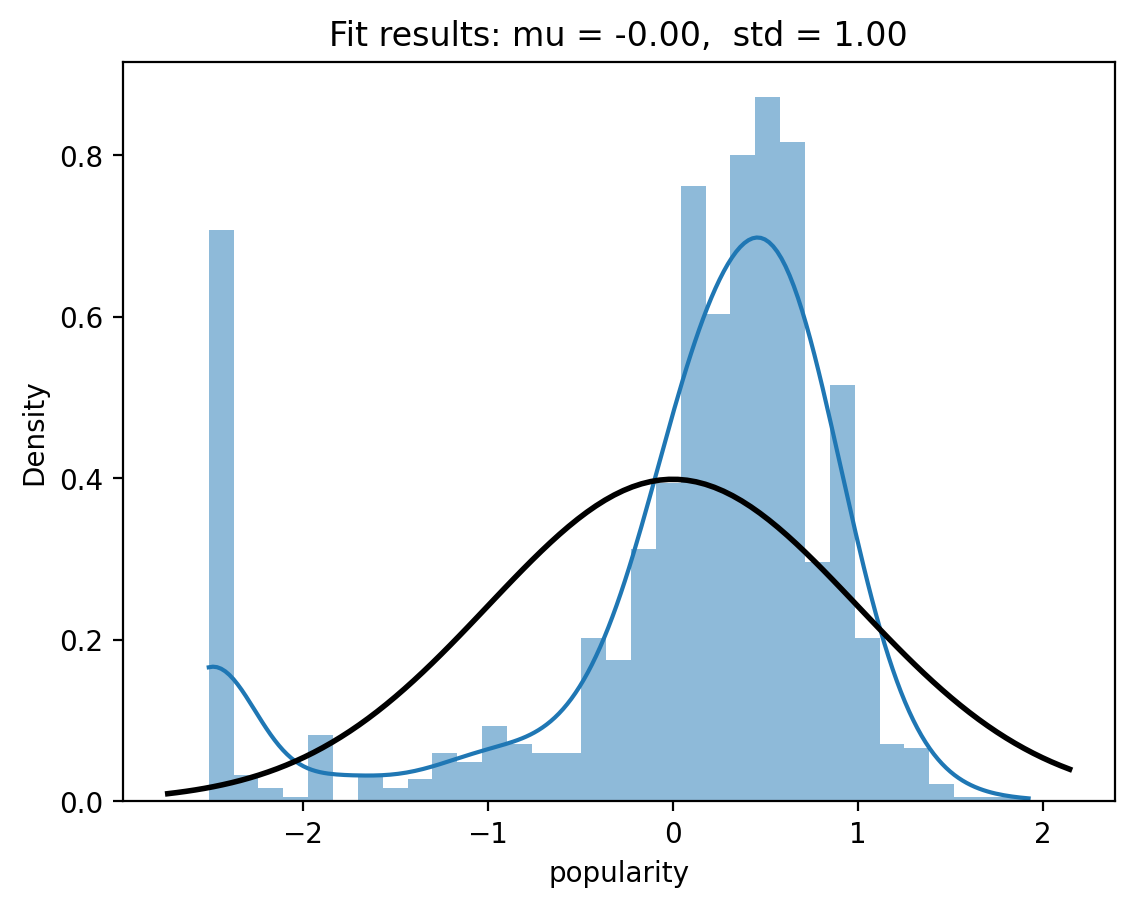

In [74]:
#Plotting the popularity column after transformation
from scipy.stats import norm
# Plotting the distribution of the 'popularity' data with a density plot and a normal distribution fit
sns.histplot(log_spotify_df['popularity'], kde=True, stat="density", linewidth=0)

# Superimpose the normal distribution
mean_popularity = log_spotify_df['popularity'].mean()
std_popularity = log_spotify_df['popularity'].std()
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean_popularity, std_popularity)
plt.plot(x, p, 'k', linewidth=2)

title = "Fit results: mu = %.2f,  std = %.2f" % (mean_popularity, std_popularity)
plt.title(title)

plt.show()


# Normalization 

In [75]:
from sklearn.preprocessing import StandardScaler
X = log_spotify_df.iloc[:,3:].values
sc_X = StandardScaler()
X_scaled = sc_X.fit_transform(X)

In [76]:
#Applying principal component Analysis(PCA)
from sklearn.decomposition import PCA
pca= PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
# To get the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

print(explained_variance_ratio)

[0.25021012 0.15393914]


In [77]:
sum(explained_variance_ratio)

0.4041492566001663

# Hierarchical clustering

Unlike in K-means clustering, where the number of clusters is specified using wcss or silhouette, here the
number of cluster for the dataset can be decided based on the dendrogram

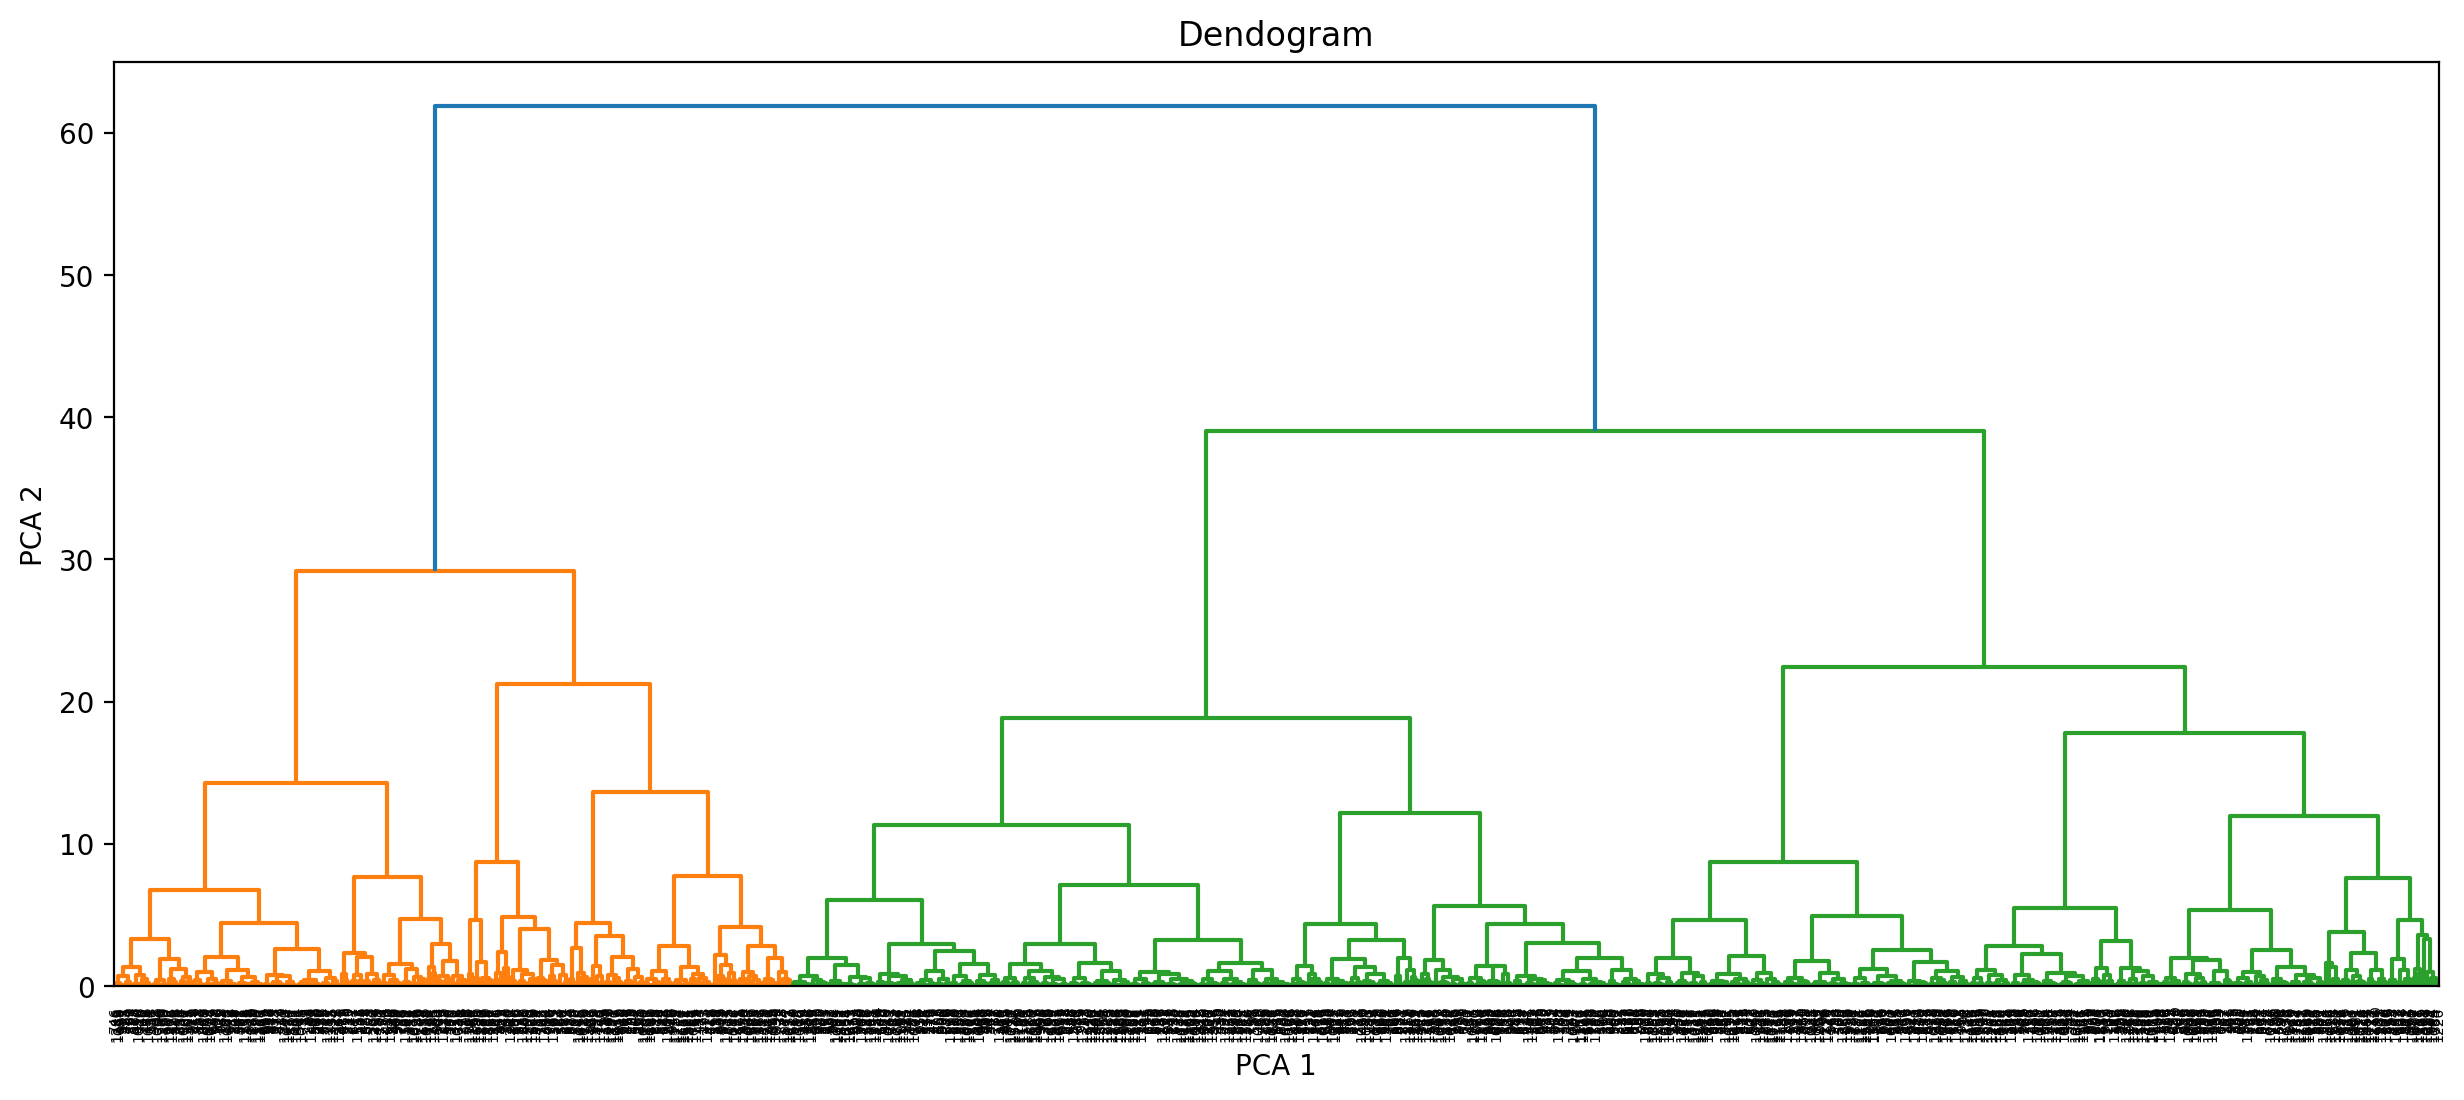

In [78]:
#Using the dendogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch

plt.figure(figsize = (15, 6))
dendrogram = sch.dendrogram(sch.linkage(X_pca, method= 'ward'))
plt.title('Dendogram') 
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

## Importing and fitting the Algorithm 
Distance metric is specified as Euclidean and linkage is specified as ward

In [79]:
#fitting Hierarchical clustering to the dataset 
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, metric = 'euclidean', linkage = 'ward')
clusters = hc.fit_predict(X_pca)

# Evaluation of Cluster Using Silhoutte score

In [80]:
#Silhoute score
from sklearn.metrics import silhouette_score
print(f'Silhouette Score(n=4): {silhouette_score(X_pca, clusters)}')

Silhouette Score(n=4): 0.30589744566575855


In [81]:
# Calculate the mean for each cluster
centroids = np.array([X_pca[clusters == label].mean(axis=0) for label in np.unique(clusters)])

# Calculate between cluster (BC) sum of squares
BC = np.sum(np.var(centroids, axis=0))

# Calculate within cluster (WC) sum of squares
WC = np.sum([np.var(X_pca[clusters == label], axis=0) for label in np.unique(clusters)])

# Calculate BC/WC ratio
BC_WC_ratio = BC / WC
print(f"The BC/WC ratio is : {BC_WC_ratio}")

The BC/WC ratio is : 0.39163809612631534


# Plotting the clusters

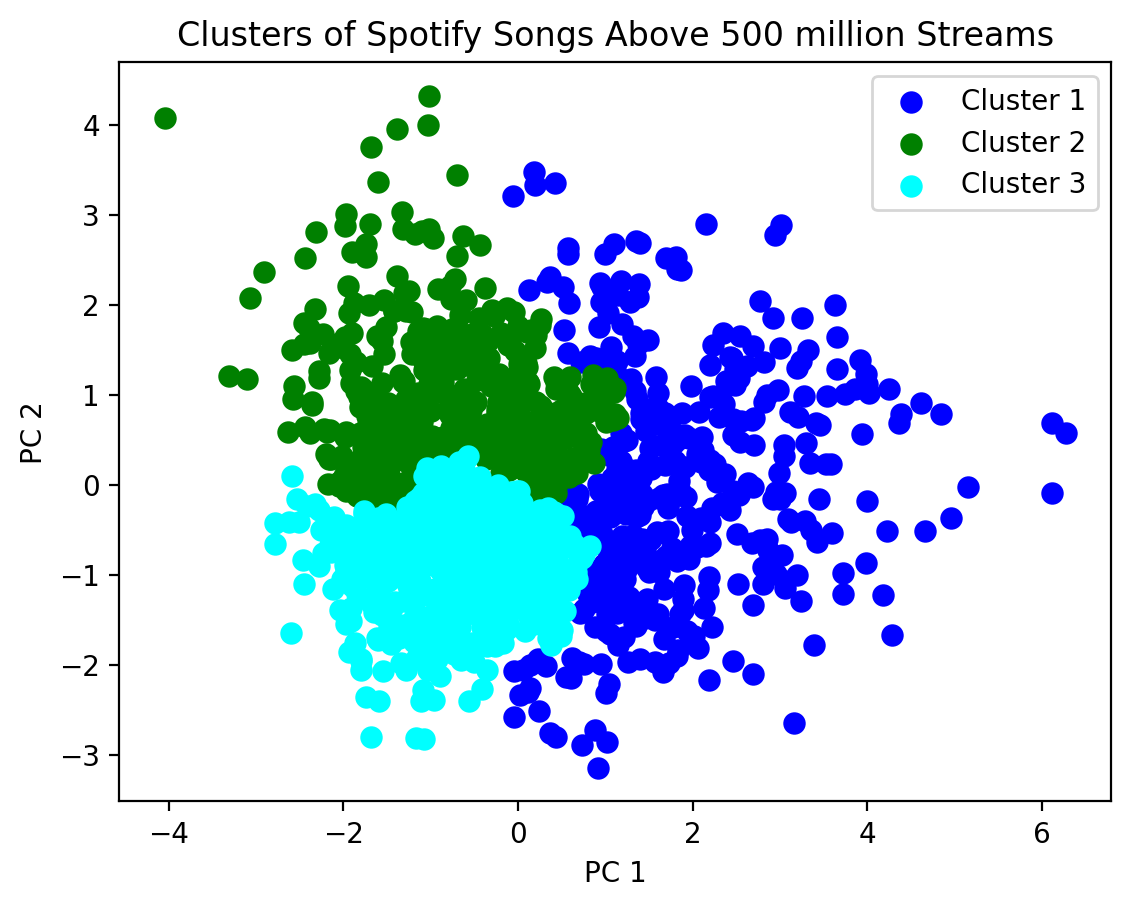

In [82]:
# Plot the clusters
plt.scatter(X_pca[clusters == 0, 0], X_pca[clusters == 0, 1], s=50, c='blue', label='Cluster 1')
plt.scatter(X_pca[clusters == 1, 0], X_pca[clusters == 1, 1], s=50, c='green', label='Cluster 2')
plt.scatter(X_pca[clusters== 2, 0], X_pca[clusters== 2, 1], s=50, c='cyan', label='Cluster 3')

plt.title('Clusters of Spotify Songs Above 500 million Streams')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend()
plt.show()

# Adding the Cluster Label to the Spotify dataframe 

In [83]:

spotify_df["clusters"] = clusters
spotify_df.head(10)

,name,album,artist,popularity,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,clusters
0,Blinding Lights,Blinding Lights,The Weeknd,18,0.513,0.796,-4.075,0.0629,0.00147,0.000209,0.0938,0.345,171.017,1
1,Shape of You,÷ (Deluxe),Ed Sheeran,88,0.825,0.652,-3.183,0.0802,0.58100,0.000000,0.0931,0.931,95.977,2
2,Someone You Loved,Divinely Uninspired To A Hellish Extent,Lewis Capaldi,90,0.501,0.405,-5.679,0.0319,0.75100,0.000000,0.1050,0.446,109.891,0
3,Sunflower - Spider-Man: Into the Spider-Verse,Spider-Man: Into the Spider-Verse (Deluxe Edit...,Post Malone,56,0.761,0.479,-5.574,0.0466,0.55200,0.000000,0.0704,0.912,89.913,0
4,Dance Monkey,Dance Monkey (Stripped Back) / Dance Monkey,Tones And I,78,0.824,0.588,-6.400,0.0924,0.69200,0.000104,0.1490,0.513,98.027,2
5,One Dance,Views,Drake,37,0.791,0.619,-5.886,0.0532,0.00784,0.004230,0.3510,0.371,103.989,2
6,rockstar,rockstar,Post Malone,37,0.577,0.522,-6.594,0.0984,0.13000,0.000090,0.1420,0.119,159.772,0
7,STAY (with Justin Bieber),F*CK LOVE 3: OVER YOU,The Kid LAROI,37,0.591,0.764,-5.484,0.0483,0.03830,0.000000,0.1030,0.478,169.928,1
8,Starboy,Starboy,The Weeknd,37,0.681,0.594,-7.028,0.2820,0.16500,0.000003,0.1340,0.535,186.054,2
9,As It Was,Harry's House,Harry Styles,94,0.520,0.731,-5.338,0.0557,0.34200,0.001010,0.3110,0.662,173.930,1


In [84]:
#Count of songs in each Cluster 
spotify_df["clusters"].value_counts()

clusters
2    499
1    463
0    396
Name: count, dtype: int64

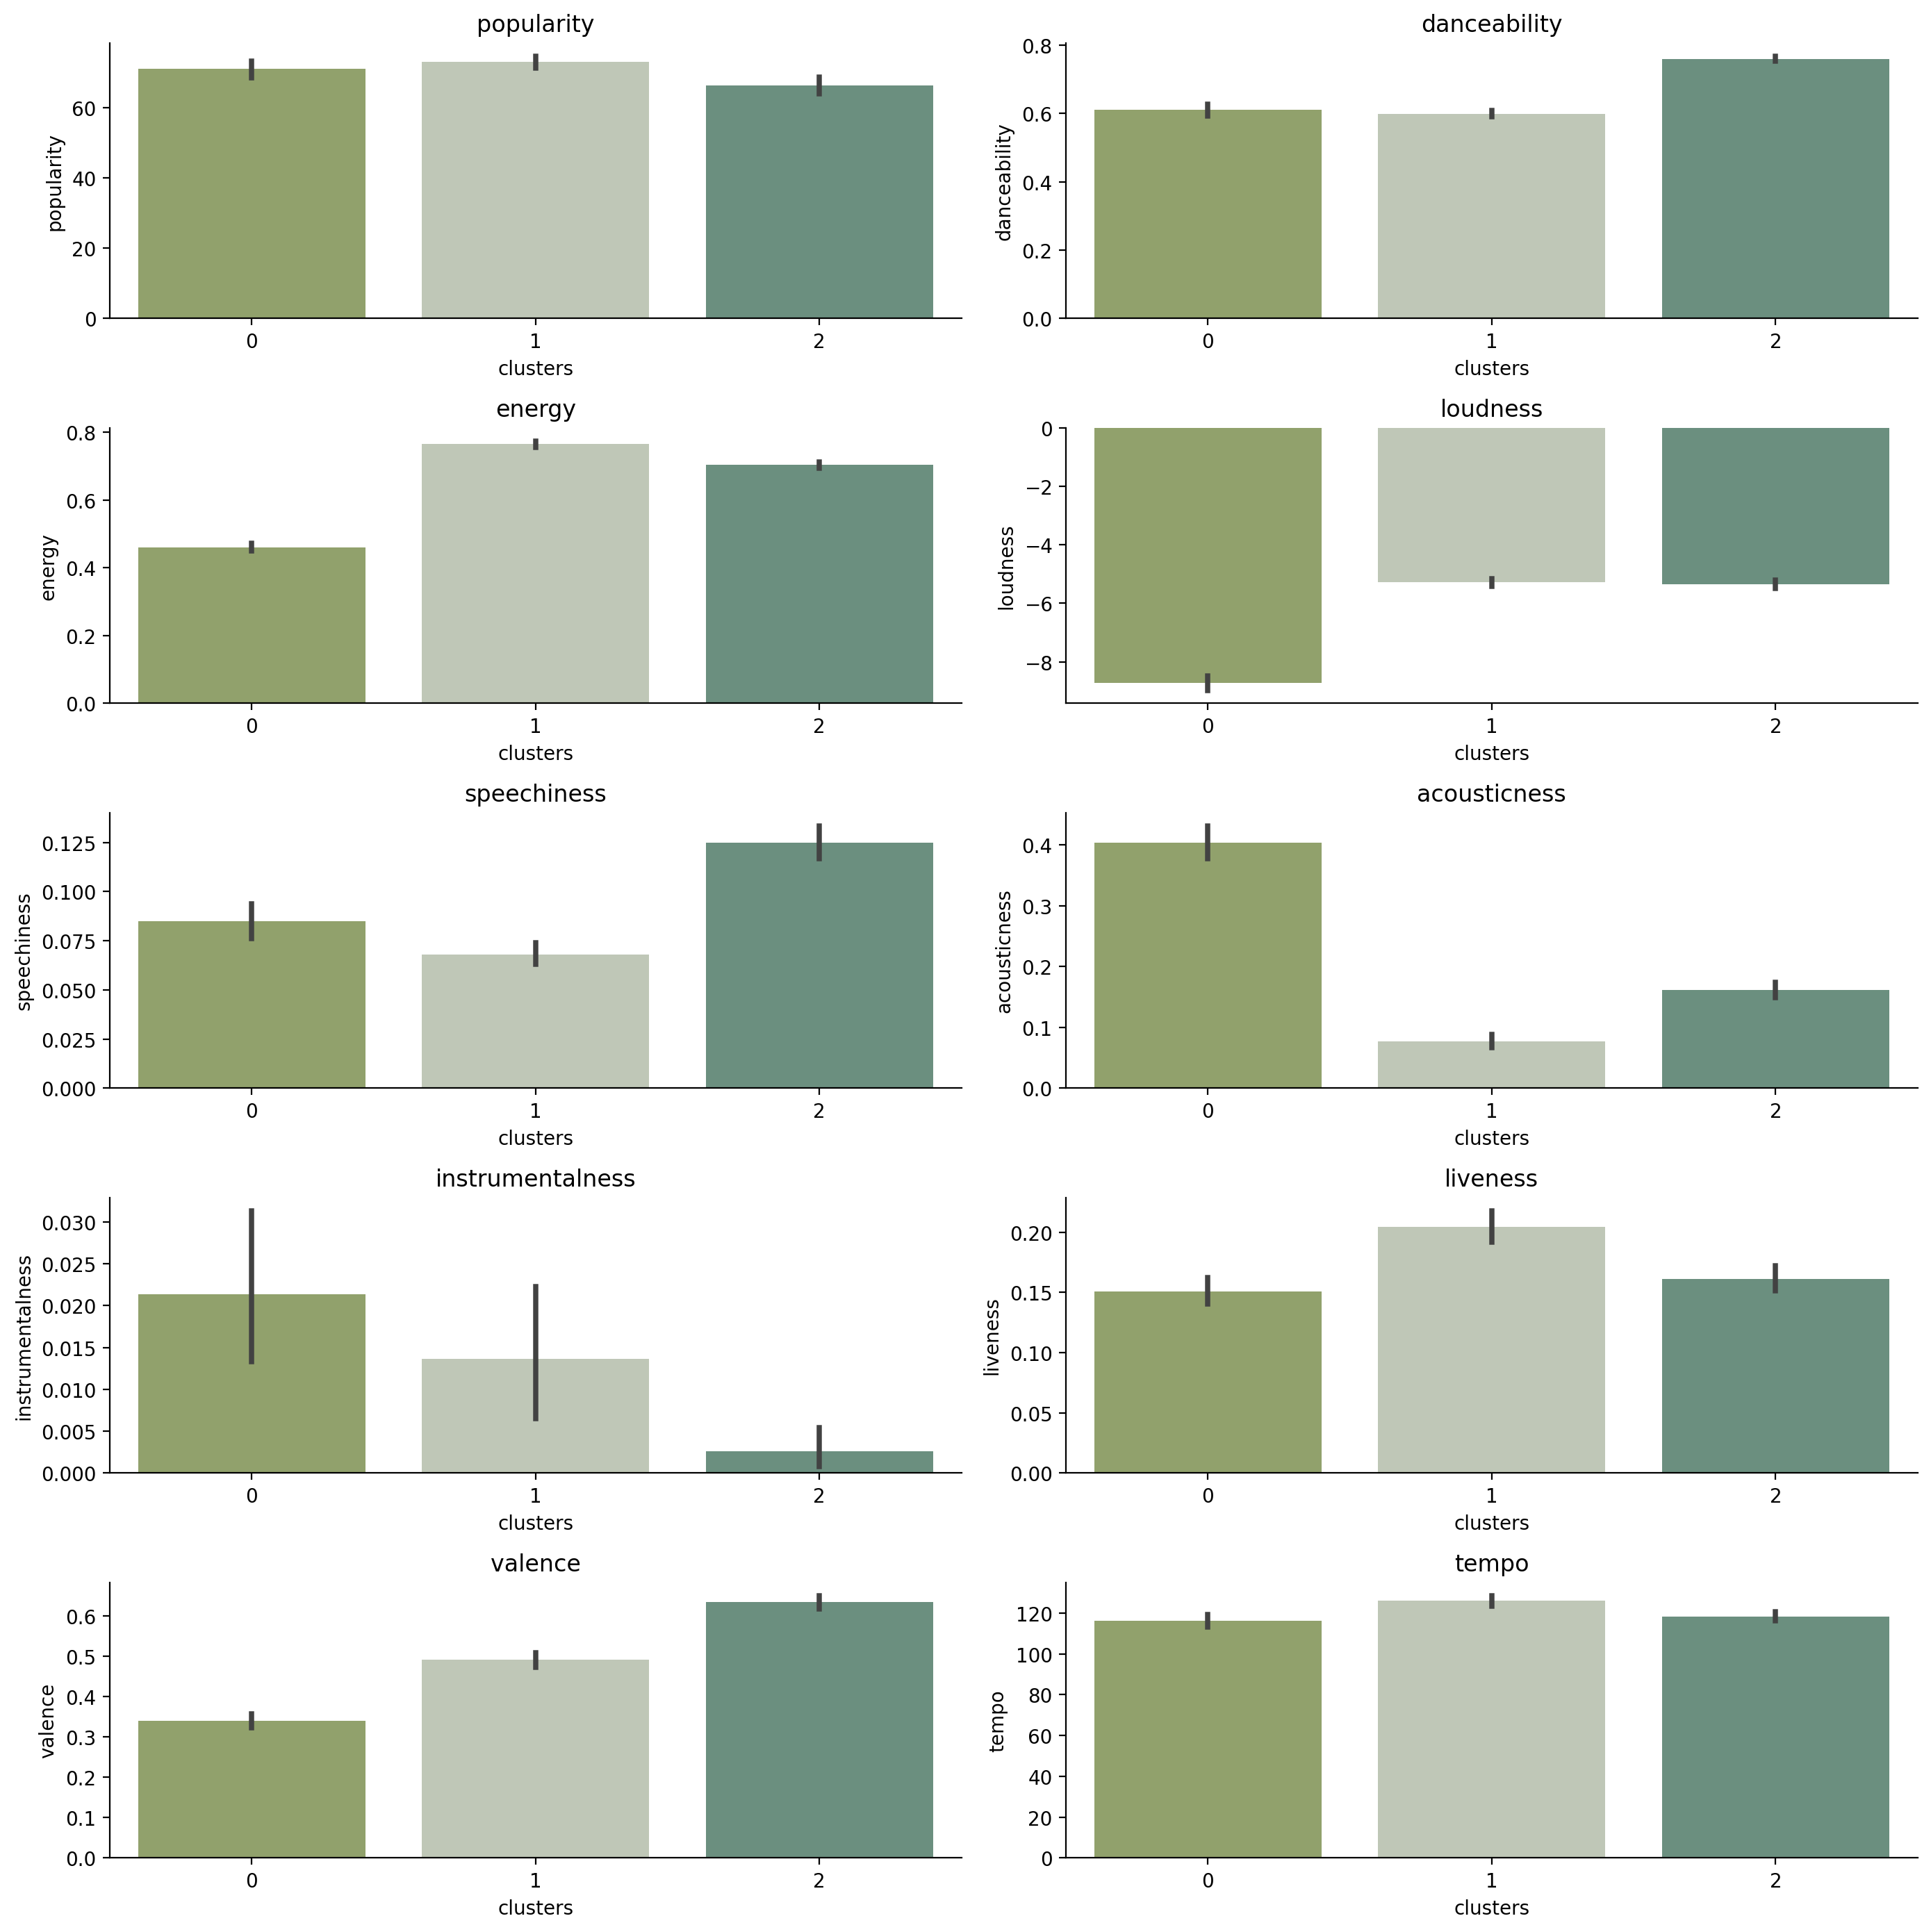

In [85]:
#Plotting each cluster against the features 
plt.figure(figsize=(14, 14))  # Adjusted for 5 rows

# Define color palette
color = ["#95AA63", "#BFCAB4", "#659580", "#9E768F"]  # Example palette

# Columns to plot (from 4th column to 'tempo')
columns_to_plot = spotify_df.columns[3:13]  # Adjust indices to include desired columns

# Create subplots for each column
for x, y in enumerate(columns_to_plot):
    plt.subplot(5, 2, x + 1)  # Adjusted to a 5x2 grid layout
    sns.barplot(x='clusters', y=y, data=spotify_df, palette=color)
    plt.title(y)
    sns.despine()

# Adjust layout and show plot
plt.tight_layout()
plt.show()


In [86]:
spotify_df[ spotify_df["clusters"]==0].sort_values(by=['danceability'], ascending=True).head(20)

,name,album,artist,popularity,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,clusters
538,All I Want,In A Perfect World (Expanded Edition),Kodaline,83,0.188,0.411,-9.733,0.0484,0.174000,0.153000,0.0843,0.1590,187.376,0
260,Fix You,X&Y,Coldplay,85,0.209,0.417,-8.740,0.0338,0.164000,0.001960,0.1130,0.1240,138.178,0
1057,It's the Most Wonderful Time of the Year,The Andy Williams Christmas Album,Andy Williams,82,0.240,0.598,-8.435,0.0369,0.766000,0.000000,0.1170,0.7760,201.629,0
1323,Heart-Shaped Box,In Utero (Deluxe Edition),Nirvana,81,0.256,0.641,-10.283,0.0552,0.199000,0.032900,0.0853,0.3820,203.006,0
153,Dusk Till Dawn (feat. Sia) - Radio Edit,Dusk Till Dawn (feat. Sia) [Radio Edit],ZAYN,77,0.259,0.437,-6.589,0.0386,0.102000,0.000001,0.1060,0.0951,180.042,0
106,"Love Me Like You Do - From ""Fifty Shades Of Grey""",Delirium (Deluxe),Ellie Goulding,80,0.262,0.606,-6.646,0.0484,0.247000,0.000000,0.1250,0.2750,189.857,0
979,We Are The Champions - Remastered 2011,News Of The World (2011 Remaster),Queen,77,0.268,0.459,-6.940,0.0346,0.378000,0.000000,0.1180,0.1750,64.177,0
762,Use Somebody,Only By The Night,Kings of Leon,80,0.276,0.715,-5.356,0.0432,0.005520,0.000417,0.2010,0.1730,137.028,0
520,This Is Me,This Is Me,Keala Settle,68,0.284,0.704,-7.276,0.1860,0.005830,0.000115,0.0424,0.1000,191.702,0
759,November Rain,Use Your Illusion I,Guns N' Roses,82,0.294,0.641,-9.316,0.0291,0.016300,0.220000,0.1120,0.2260,79.759,0


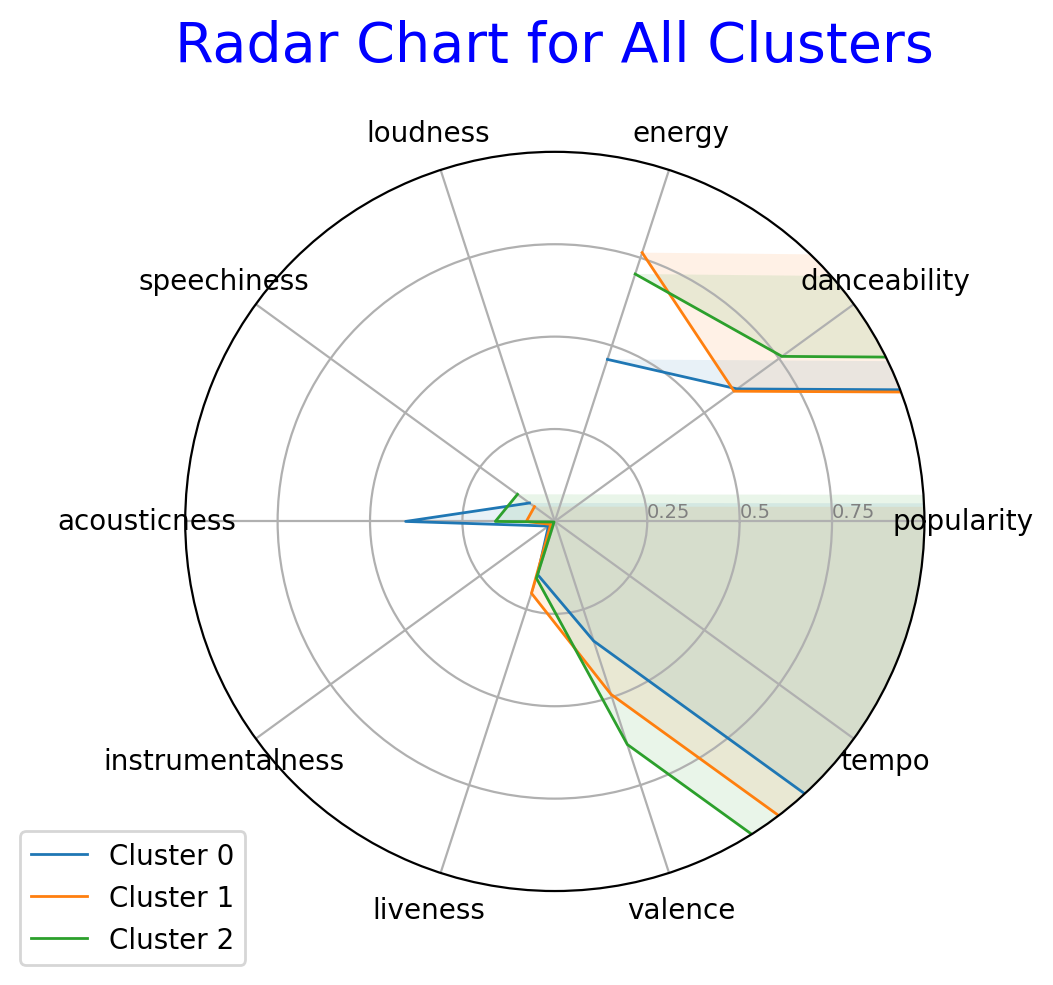

In [87]:
from math import pi
# Calculate the mean for each cluster
cluster_means = spotify_df.iloc[:,3:].groupby('clusters').mean()
# Number of variables (assume all except 'cluster' column are features)
categories = list(cluster_means.columns)
N = len(categories)
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]  # complete the loop
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
# Draw one axe per variable + add labels
plt.xticks(angles[:-1], categories)
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([0.25, 0.5, 0.75], ["0.25","0.5","0.75"], color="grey", size=7)
plt.ylim(0,1)
# Plot data and fill area for each cluster
for cluster in cluster_means.index:
    values = cluster_means.loc[cluster].values.flatten().tolist()
    values += values[:1]  # repeat the first value to close the circular graph
    ax.plot(angles, values, linewidth=1, linestyle='solid', label='Cluster {}'.format(cluster))
    ax.fill(angles, values, alpha=0.1)

# Add legend and title
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.title('Radar Chart for All Clusters', size=20, color='blue', y=1.1)

# Show the plot
plt.show()

# Building the Recommendation System

#Create a new DataFrame new_df by selecting the columns name, album, artist, and clusters from the existing spotify_df.

In [96]:
new_df = spotify_df[['name', 'album', 'artist', 'clusters']]

In [1]:
#Convert the clusters column in new_df to string type to ensure all entries are treated as text for further processing.
new_df['clusters'] = new_df['clusters'].astype(str)

#Create a new column 'tags' in new_df

new_df['tags'] = new_df['name']+ ' '+new_df['album']+ ' '+new_df['artist']+ ' '+new_df['clusters']
new_df['tags'][0]

NameError: name 'new_df' is not defined

In [101]:
#Create another DataFrame new1_df by selecting only the name and tags
new1_df =new_df[['name', 'tags']]
new1_df

,name,tags
0,Blinding Lights,Blinding Lights Blinding Lights The Weeknd 1
1,Shape of You,Shape of You ÷ (Deluxe) Ed Sheeran 2
2,Someone You Loved,Someone You Loved Divinely Uninspired To A Hel...
3,Sunflower - Spider-Man: Into the Spider-Verse,Sunflower - Spider-Man: Into the Spider-Verse ...
4,Dance Monkey,Dance Monkey Dance Monkey (Stripped Back) / Da...
...,...,...
1353,AMG,AMG Nata Montana Natanael Cano 2
1354,Come Together - Remastered 2009,Come Together - Remastered 2009 Abbey Road (Re...
1355,Yesterday - Remastered 2009,Yesterday - Remastered 2009 Help! (Remastered)...
1356,Let It Be - Remastered 2009,Let It Be - Remastered 2009 Let It Be (Remaste...


In [102]:
#Convert all text in the tags column of new1_df to lowercase
new1_df['tags']= new1_df['tags'].apply(lambda x:x.lower())

 # Import necessary libraries for computing similarity scores: 
 CountVectorizer for text vectorization, and cosine_similarity for computing similarity scores.


In [88]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity


In [104]:
# Initialize a CountVectorizer object, Fit and transform the tags column into vectors

vectors = cv.fit_transform(new1_df['tags']).toarray()


In [105]:
vectors.shape

(1358, 2000)

In [109]:
cv.get_feature_names()

AttributeError: 'CountVectorizer' object has no attribute 'get_feature_names'

In [110]:
# Compute cosine similarity matrix from the vectors array to measure the similarity between all pairs of songs.
similarity = cosine_similarity(vectors)

In [ ]:
#Sort and list the similarity scores for the first song in descending order
sorted(list(enumerate(similarity[0])),reverse= True, key=)

In [91]:
#Define a function recommend to generate song recommendations based on a given song name
def recommend(song_name, spotify_df =spotify_df, similarity=similarity):
    idx = spotify_df[spotify_df['name'] == song_name].index[0]
    song_cluster = spotify_df.loc[idx, 'clusters']
    cluster_indices = spotify_df[spotify_df['clusters'] == song_cluster].index
    cluster_similarity_scores = similarity[idx, cluster_indices]
    similar_songs = pd.DataFrame({
        'name': spotify_df.loc[cluster_indices, 'name'],
        'album': spotify_df.loc[cluster_indices, 'album'],
        'artist': spotify_df.loc[cluster_indices, 'artist'],
        'similarity_score': cluster_similarity_scores
    })
    similar_songs = similar_songs.sort_values(by='similarity_score', ascending=False)
    return similar_songs[similar_songs['name'] != song_name].head(5)

# The above Function can be called to get 5 recommendations with close similarity for each of the song in the dataset

In [92]:
# Call the recommend function to get recommendations for the song "All I Want".
recommend('All I Want')


,name,album,artist,similarity_score
1323,Heart-Shaped Box,In Utero (Deluxe Edition),Nirvana,0.882146
153,Dusk Till Dawn (feat. Sia) - Radio Edit,Dusk Till Dawn (feat. Sia) [Radio Edit],ZAYN,0.870254
260,Fix You,X&Y,Coldplay,0.851403
106,"Love Me Like You Do - From ""Fifty Shades Of Grey""",Delirium (Deluxe),Ellie Goulding,0.844673
328,All I Want for Christmas Is You,Merry Christmas,Mariah Carey,0.832411
